 
 1. Veri Keşfi (EDA)
 

In [ ]:
#  Gerekli kütüphaneler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#  Veri yükleme
train = pd.read_csv("C:/Users/hp/Desktop/Python çalışmaları/House prices için medium + github + kaggle çalışması,/house_prices.csv")
test = pd.read_csv("C:/Users/hp/Desktop/Python çalışmaları/House prices için medium + github + kaggle çalışması,/house_prices.csv")

In [ ]:
#  Veri hakkında temel bilgiler
print("Veri şekli:", train.shape)
print("\nVeri tipi bilgisi:")
print(train.info())
print("\nİstatistiksel özet:")
print(train.describe())


Veri şekli: (187531, 21)

Veri tipi bilgisi:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187531 entries, 0 to 187530
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   Index              187531 non-null  int64  
 1   Title              187531 non-null  object 
 2   Description        184508 non-null  object 
 3   Amount(in rupees)  187531 non-null  object 
 4   Price (in rupees)  169866 non-null  float64
 5   location           187531 non-null  object 
 6   Carpet Area        106858 non-null  object 
 7   Status             186916 non-null  object 
 8   Floor              180454 non-null  object 
 9   Transaction        187448 non-null  object 
 10  Furnishing         184634 non-null  object 
 11  facing             117298 non-null  object 
 12  overlooking        106095 non-null  object 
 13  Society            77853 non-null   object 
 14  Bathroom           186703 non-null  object 
 15  Balcon

C:\Users\hp\AppData\Local\Temp\ipykernel_1632\3784447944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="viridis")


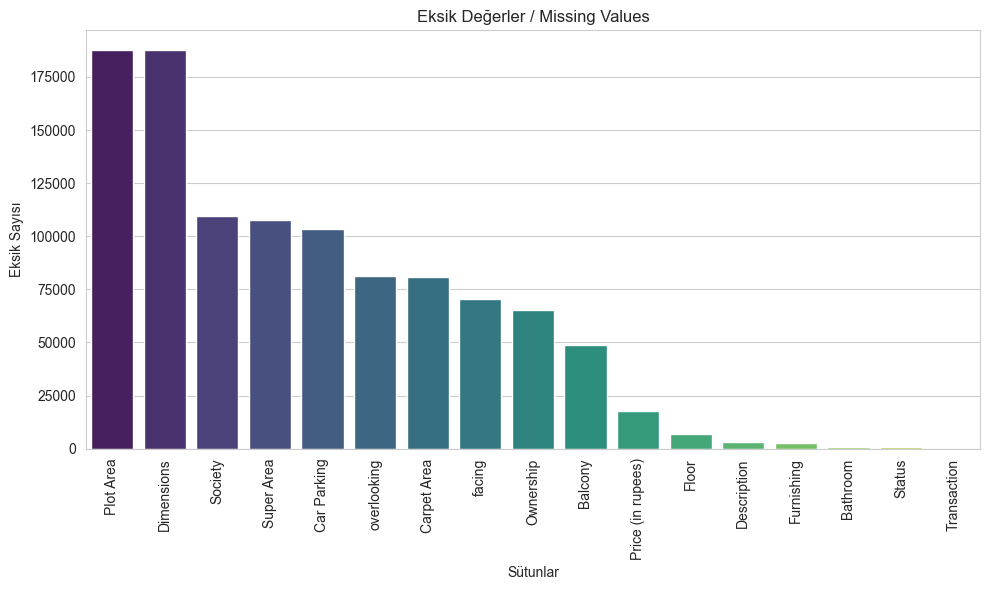

In [ ]:
#  Eksik değer analizi
missing = train.isnull().sum()
missing = missing[missing > 0].sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=missing.index, y=missing.values, palette="viridis")
plt.xticks(rotation=90)
plt.title("Eksik Değerler / Missing Values")
plt.ylabel("Eksik Sayısı")
plt.xlabel("Sütunlar")
plt.tight_layout()
plt.show()

In [ ]:
#  Hedef değişken: Price (in rupees) dağılımı

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


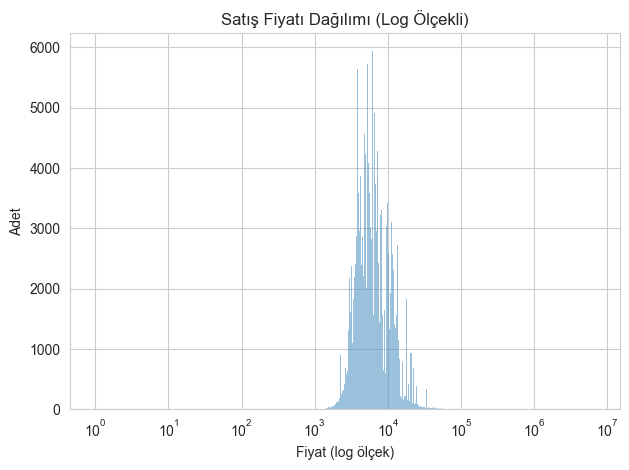

In [ ]:
## 1 Logaritmik eksenle histogram
sns.histplot(train['Price (in rupees)'], kde=True, log_scale=True)
plt.title("Satış Fiyatı Dağılımı (Log Ölçekli)")
plt.xlabel("Fiyat (log ölçek)")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

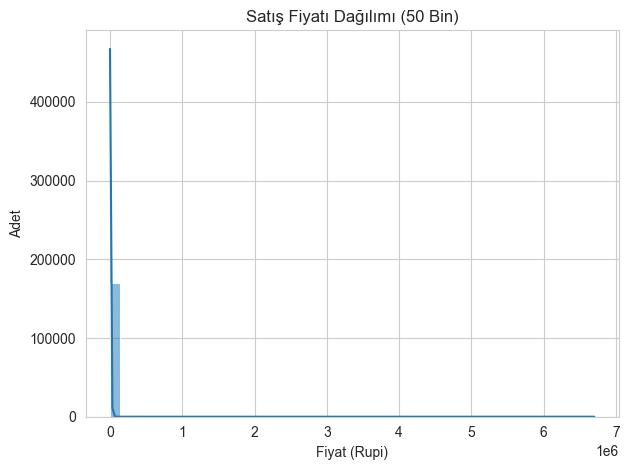

In [ ]:
##  2 Bin sayısını ayarlayarak daha pürüzsüz görünüm
sns.histplot(train['Price (in rupees)'], bins=50, kde=True)
plt.title("Satış Fiyatı Dağılımı (50 Bin)")
plt.xlabel("Fiyat (Rupi)")
plt.ylabel("Adet")
plt.tight_layout()
plt.show()

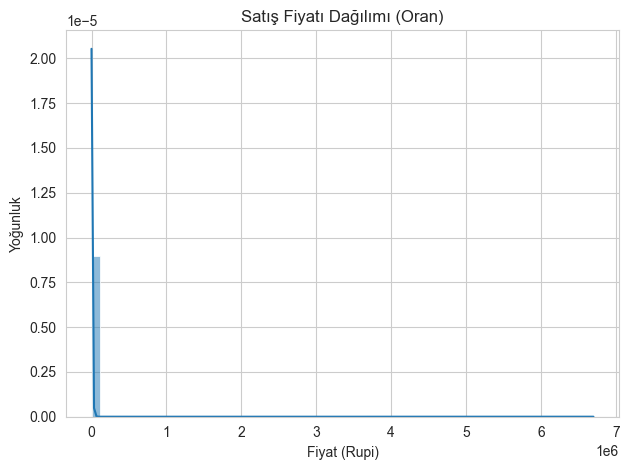

In [ ]:
## 3 Yoğunluk (density) ile oran gösterimi
sns.histplot(train['Price (in rupees)'], bins=60, stat='density', kde=True)
plt.title("Satış Fiyatı Dağılımı (Oran)")
plt.xlabel("Fiyat (Rupi)")
plt.ylabel("Yoğunluk")
plt.tight_layout()
plt.show()

In [ ]:
#  Stil ayarı
sns.set_style("whitegrid")


In [ ]:
#  Aykırı değerleri filtreleme (< 3 milyon rupi)
filtered = train[train['Price (in rupees)'] < 3000000]


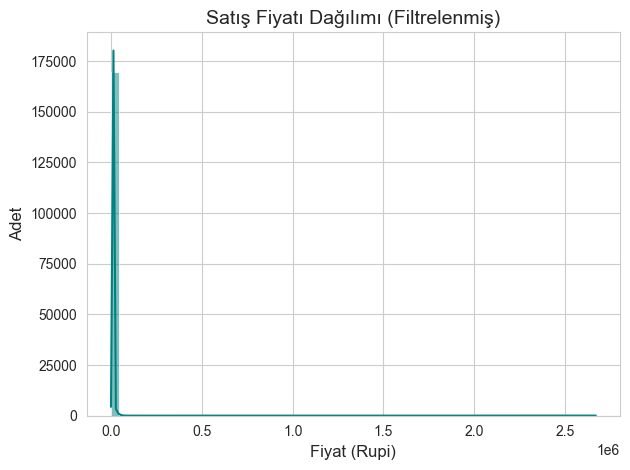

In [ ]:
#  Filtrelenmiş histogram
sns.histplot(filtered['Price (in rupees)'], bins=60, kde=True, color="teal")
plt.title("Satış Fiyatı Dağılımı (Filtrelenmiş)", fontsize=14)
plt.xlabel("Fiyat (Rupi)", fontsize=12)
plt.ylabel("Adet", fontsize=12)
plt.tight_layout()
plt.show()


In [45]:
# 🔍 İlk 20 satırda Dimensions ve Plot Area sütunlarını kontrol et
print("\nDimensions ve Plot Area sütunlarının ilk 20 satırı:")
print(train[['Dimensions', 'Plot Area']].dropna().head(20))


Dimensions ve Plot Area sütunlarının ilk 20 satırı:
Empty DataFrame
Columns: [Dimensions, Plot Area]
Index: []


In [ ]:
# Korelasyon Matrisi – Sayısal Sütunlarla

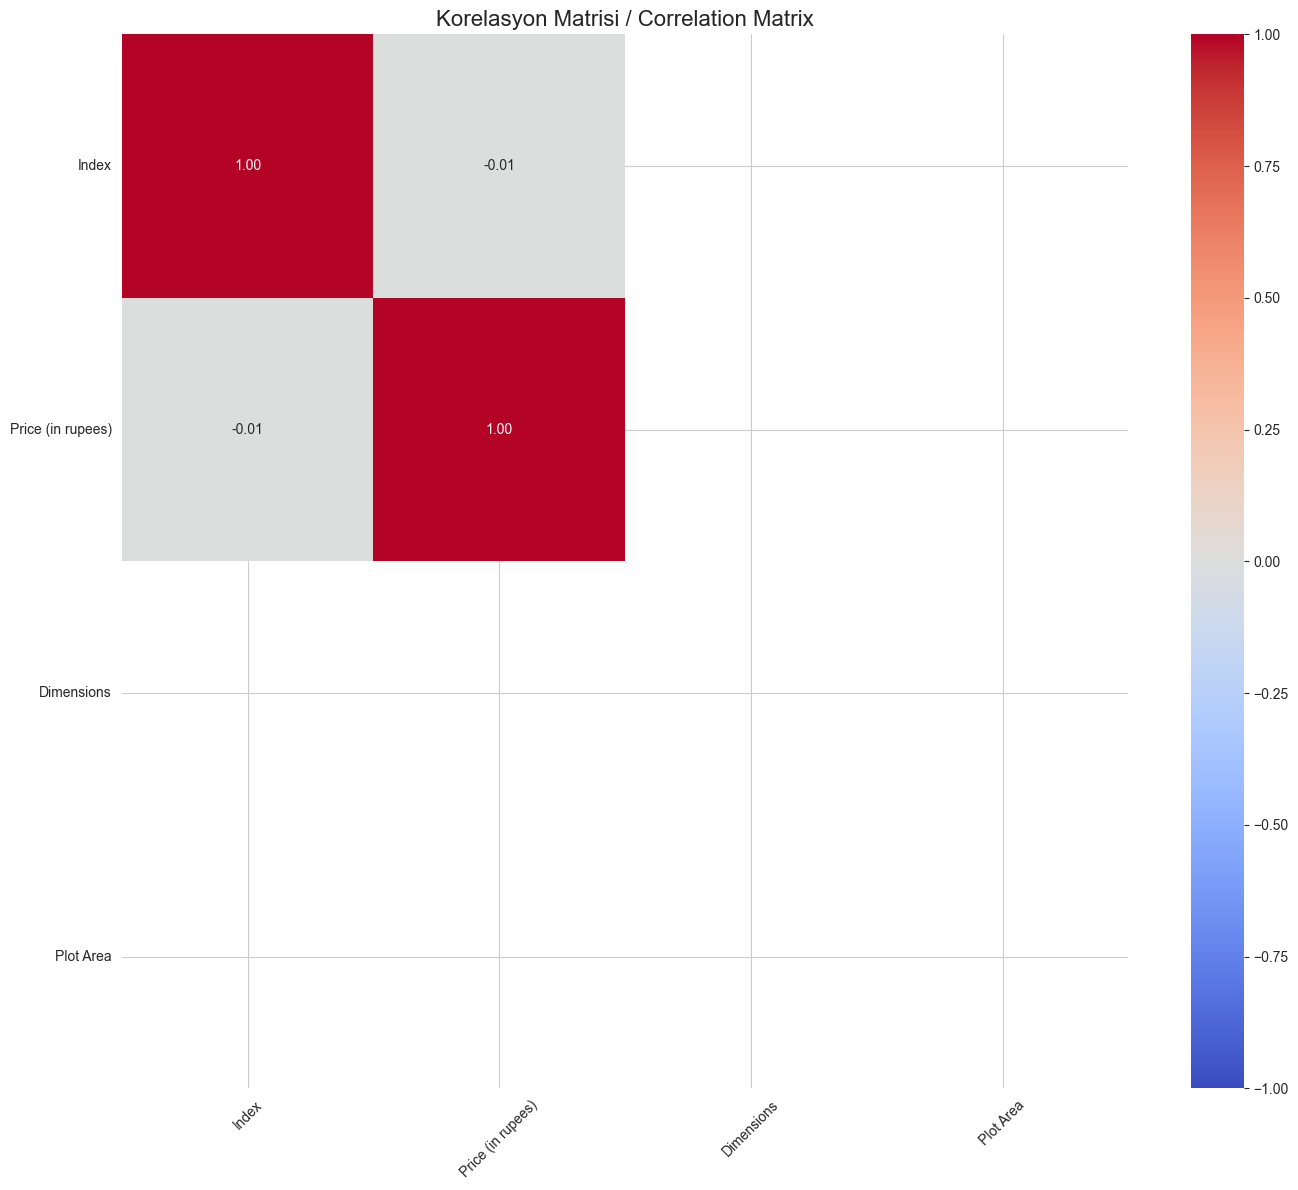

In [ ]:
# Sadece sayısal sütunları seçiyoruz
numeric_df = train.select_dtypes(include='number')

# Korelasyon matrisi oluştur
corr = numeric_df.corr()

# Isı haritası ile görselleştir
plt.figure(figsize=(14,12))
sns.heatmap(corr, cmap="coolwarm", center=0, annot=True, fmt=".2f", vmin=-1, vmax=1)
plt.title("Korelasyon Matrisi / Correlation Matrix", fontsize=16)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

In [ ]:
# En güçlü korelasyonlar
corr_target = corr['Price (in rupees)'].sort_values(ascending=False)
print(corr_target.head(15))

Price (in rupees)    1.000000
Index               -0.007507
Dimensions                NaN
Plot Area                 NaN
Name: Price (in rupees), dtype: float64


2. Veri Ön İşleme

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Eksik değer doldurma
train = train.fillna(train.median(numeric_only=True))

# Kategorik değişkenleri encode etme
categorical_cols = train.select_dtypes(include=['object']).columns
for col in categorical_cols:
    le = LabelEncoder()
    train[col] = le.fit_transform(train[col].astype(str))

# Özellikler & hedef
X = train.drop("Price (in rupees)", axis=1)
y = train["Price (in rupees)"]

# Train-test bölme
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Ölçekleme
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)


c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1144: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1149: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\extmath.py:1169: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


3. Modelleme

In [49]:
from sklearn.impute import SimpleImputer

# Imputer tanımla
imputer = SimpleImputer(strategy='mean')

# X_train ve X_valid üzerinde uygula
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [18 19]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [18 19]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=200, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=500, learning_rate=0.05, random_state=42)
}

In [51]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_valid_imputed = imputer.transform(X_valid)

c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [18 19]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(
c:\Users\hp\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\impute\_base.py:653: UserWarning: Skipping features without any observed values: [18 19]. At least one non-missing value is needed for imputation with strategy='mean'.
  warnings.warn(


In [52]:
for name, model in models.items():
    model.fit(X_train_imputed, y_train)
    preds = model.predict(X_valid_imputed)
    rmse = np.sqrt(mean_squared_error(y_valid, preds))
    print(f"{name} RMSE: {rmse:.2f}")

Linear Regression RMSE: 21253.69
Random Forest RMSE: 25657.23
XGBoost RMSE: 25569.39


4. Değerlendirme & İyileştirme 

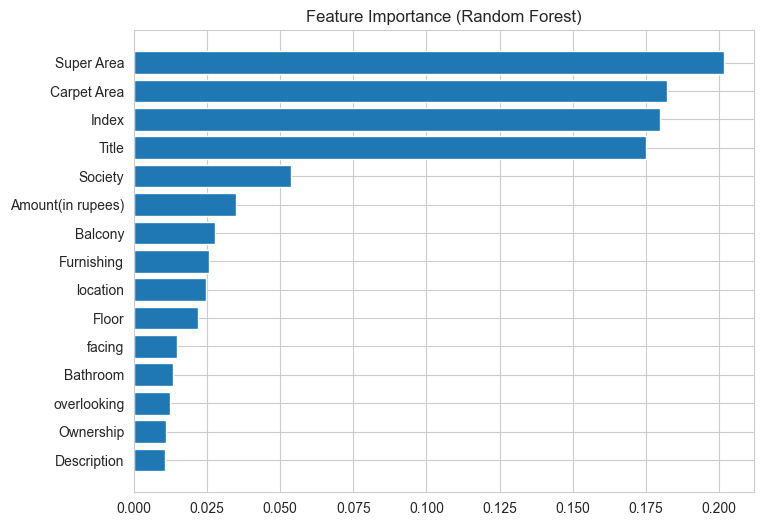

Fitting 3 folds for each of 27 candidates, totalling 81 fits
En iyi parametreler: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200}
En iyi skor: 25377.04828238256


In [53]:
# Feature importance (Random Forest)
rf = RandomForestRegressor(n_estimators=200, random_state=42)
rf.fit(X_train, y_train)

importances = rf.feature_importances_
indices = np.argsort(importances)[-15:]

plt.figure(figsize=(8,6))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), np.array(X.columns)[indices])
plt.title("Feature Importance (Random Forest)")
plt.show()

# Hyperparameter Tuning (XGBoost örneği)
from sklearn.model_selection import GridSearchCV

xgb = XGBRegressor(random_state=42)
param_grid = {
    "n_estimators": [200, 500, 1000],
    "learning_rate": [0.01, 0.05, 0.1],
    "max_depth": [3, 5, 7]
}
grid = GridSearchCV(xgb, param_grid, cv=3, scoring="neg_root_mean_squared_error", verbose=1)
grid.fit(X_train, y_train)

print("En iyi parametreler:", grid.best_params_)
print("En iyi skor:", -grid.best_score_)
